In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../ch07_autograd')))
from utils import Scalar, draw_graph
from linear_model import Linear, mse

In [2]:
import torch

torch.manual_seed(1024)

In [3]:
x = torch.linspace(100, 300, 200)
x = (x - torch.mean(x)) / torch.std(x)
epsilon = torch.randn(x.shape)
y = 10 * x + 5 + epsilon

In [4]:
model = Linear()

batch_size = 20
learning_rate = 0.1

for t in range(20):
    ix = (t * batch_size) % len(x)
    xx = x[ix: ix + batch_size]
    yy = y[ix: ix + batch_size]
    loss = mse([model.error(_x, _y) for _x, _y in zip(xx, yy)])
    loss.backward()
    model.a -= learning_rate * model.a.grad
    model.b -= learning_rate * model.b.grad
    model.a.grad = 0.0
    model.b.grad = 0.0
    print(model.string())

y = 3.12 * x + -1.99
y = 3.48 * x + -2.28
y = 3.22 * x + -1.97
y = 2.85 * x + -1.22
y = 2.68 * x + -0.23
y = 2.92 * x + 1.08
y = 3.74 * x + 2.61
y = 5.07 * x + 4.15
y = 6.73 * x + 5.52
y = 8.22 * x + 6.48
y = 9.36 * x + 5.75
y = 9.75 * x + 5.42
y = 9.88 * x + 5.28
y = 9.89 * x + 5.26
y = 9.89 * x + 5.20
y = 9.88 * x + 5.18
y = 9.88 * x + 5.17
y = 9.84 * x + 5.14
y = 9.86 * x + 5.15
y = 9.94 * x + 5.21


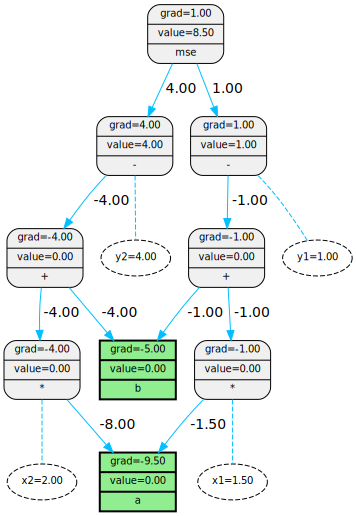

In [5]:
# 计算图膨胀
model = Linear()
# 定义两组数据
x1 = Scalar(1.5, label='x1', requires_grad=False)
y1 = Scalar(1.0, label='y1', requires_grad=False)
x2 = Scalar(2.0, label='x2', requires_grad=False)
y2 = Scalar(4.0, label='y2', requires_grad=False)
loss = mse([model.error(x1, y1), model.error(x2, y2)])
loss.backward()
draw_graph(loss, 'backward')

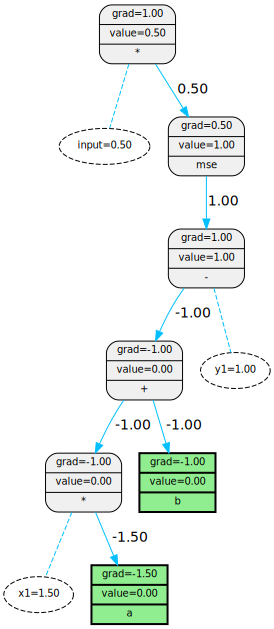

In [7]:
# 第一次传播
model = Linear()
loss = 0.5 * mse([model.error(x1, y1)])
loss.backward()
draw_graph(loss, 'backward')

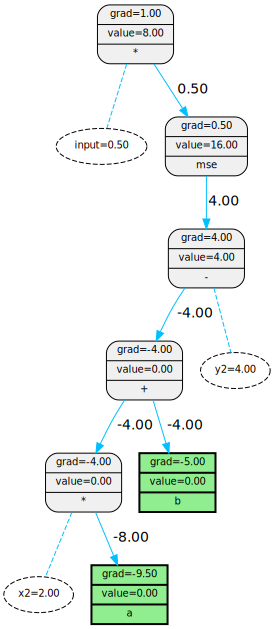

In [8]:
# 第二次传播（梯度积累）
loss = 0.5 * mse([model.error(x2, y2)])
loss.backward()
draw_graph(loss, 'backward')

In [12]:
model = Linear()

batch_size = 20
learning_rate = 0.1
# 梯度积累次数
gradient_accu_iter = 4
# 小批量数据量
micro_size = int(batch_size / gradient_accu_iter)


for t in range(20 * gradient_accu_iter):
    ix = (t * micro_size) % len(x)
    xx = x[ix: ix + micro_size]
    yy = y[ix: ix + micro_size]
    loss = mse([model.error(_x, _y) for _x, _y in zip(xx, yy)])
    # 调整权重
    loss *= 1 / gradient_accu_iter
    loss.backward()
    if (t + 1) % gradient_accu_iter == 0:
        model.a -= learning_rate * model.a.grad
        model.b -= learning_rate * model.b.grad
        model.a.grad = 0.0
        model.b.grad = 0.0
        print(model.string())
    #model.a -= learning_rate * model.a.grad
    #model.b -= learning_rate * model.b.grad
    #model.a.grad = 0.0
    #model.b.grad = 0.0
    #print(model.string())

y = 3.12 * x + -1.99
y = 3.48 * x + -2.28
y = 3.22 * x + -1.97
y = 2.85 * x + -1.22
y = 2.68 * x + -0.23
y = 2.92 * x + 1.08
y = 3.74 * x + 2.61
y = 5.07 * x + 4.15
y = 6.73 * x + 5.52
y = 8.22 * x + 6.48
y = 9.36 * x + 5.75
y = 9.75 * x + 5.42
y = 9.88 * x + 5.28
y = 9.89 * x + 5.26
y = 9.89 * x + 5.20
y = 9.88 * x + 5.18
y = 9.88 * x + 5.17
y = 9.84 * x + 5.14
y = 9.86 * x + 5.15
y = 9.94 * x + 5.21
